# Présentation du TP

Dans ce TP, l'objectif est d'implémenter les opérations simples sur les graphes orientés. 
La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.


## Installation de graphviz pour pouvoir visualiser les graphes

In [1]:
!pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

('0.19.1', (2, 43, 0))

## Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [2]:
def creation_graphe_graphviz(g):
    # création d'un graphe orienté
    dot = graphviz.Digraph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot


## Création et affichage d'un premier graphe orienté


In [3]:
graphe1 = [[0,1,1],
          [1,0,1],
          [1,0,0]]

#### Affichage de la matrice

In [4]:
print(graphe1)

[[0, 1, 1], [1, 0, 1], [1, 0, 0]]


#### Création du graphe associé, au format graphviz, pour pouvoir faire l'affichage de la représentation sagittale du graphe

In [5]:
gdot1 = creation_graphe_graphviz(graphe1)
print(gdot1.source)

digraph {
	0
	1
	2
	0 -> 1
	0 -> 2
	1 -> 0
	1 -> 2
	2 -> 0
}



#### Affichage de la représentation sagittale du graphe

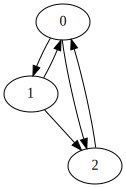

In [6]:
gdot1



# Définition des premières fonctions pour manipuler les graphes

#### Fonction qui construit un graphe vide (sans arcs), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [7]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

In [8]:
# test de la fonction graphe_vide
graphe2 = graphe_vide(5)
print(graphe2)
gdot2 = creation_graphe_graphviz(graphe2)
gdot2

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


### Fonction qui retourne vrai si l'arc, dont les numéros de sommets extrémités sont donnés, existe

In [9]:
def est_arc(g, i, j):
    return bool(g[i][j])

In [10]:
# test de la fonction est_arc
print(est_arc(graphe1, 0, 0))
print(est_arc(graphe1, 0, 1))

False
True



#### Fonction qui ajoute un arc au graphe, s'il n'est pas déjà présent

In [11]:
def ajoute_arc(g, i, j):
    g[i][j] = 1

In [12]:
# test de la fonction ajoute_arc
ajoute_arc(graphe1, 0, 0)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

In [13]:
# test de la fonction ajoute_arc
ajoute_arc(graphe1, 0, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### Fonction qui ote un arc du graphe, s'il était déjà présent

In [14]:
def ote_arc(g, i, j):
    g[i][j] = 0

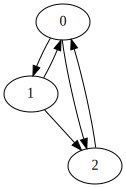

In [15]:
# test de la fonction ote_arc
ote_arc(graphe1, 0, 0)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

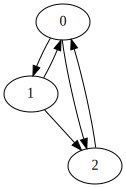

In [16]:
# test de la fonction ote_arc
ote_arc(graphe1, 1, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### Fonction qui retourne le nombre de sommets du graphe

In [17]:
def nb_sommets(g):
    return len(g)

In [18]:
# test de la fonction nb_sommets
n = nb_sommets(graphe1)
print("Nombre de sommets :", n)

Nombre de sommets : 3


#### Fonction qui indique si un graphe est simple

In [19]:
def est_simple(g):
    for i, j in enumerate(g):
        if j[i]:
            return False
    return True

In [20]:
# test de la fonction est_simple
print("Graphe simple ?", est_simple(graphe1))

Graphe simple ? True


#### Fonction qui indique si un graphe est complet

In [21]:
def est_complet(g):
    for i in g:
        for j in i:
            if not j:
                return False
    return True

In [22]:
# test de la fonction est_complet
print("Graphe complet ?", est_complet(graphe1))

Graphe complet ? False


#### Fonction qui indique si un graphe est symétrique

In [23]:
def est_symetrique(g):
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] != g[j][i]:
                return False
    return True

In [24]:
# test de la fonction est_symetrique
print("Graphe symétrique ?", est_symetrique(graphe1))

Graphe symétrique ? False


#### Fonction qui retourne le degré entrant du sommet donné

In [25]:
def degre_entrant(g, s):
    somme = 0
    for i in g:
        somme += i[s]
    return somme

In [26]:
# test de la fonction degre_entrant
print("degré entrant du sommet 0 :", degre_entrant(graphe1,0))
print("degré entrant du sommet 1 :", degre_entrant(graphe1,1))
print("degré entrant du sommet 2 :", degre_entrant(graphe1,2))

degré entrant du sommet 0 : 2
degré entrant du sommet 1 : 1
degré entrant du sommet 2 : 2


#### Fonction qui retourne le degré sortant du sommet donné

In [27]:
def degre_sortant(g, s):
    return sum(g[s])

In [28]:
# test de la fonction degre_sortant
print("degré sortant du sommet 0 :", degre_sortant(graphe1,0))
print("degré sortant du sommet 1 :", degre_sortant(graphe1,1))
print("degré sortant du sommet 2 :", degre_sortant(graphe1,2))

degré sortant du sommet 0 : 2
degré sortant du sommet 1 : 2
degré sortant du sommet 2 : 1


#### Fonction qui retourne le degré total du sommet donné

In [29]:
def degre_total(g, s):
    return degre_entrant(g, s) + degre_sortant(g, s)

In [30]:
# test de la fonction degre_total
print("degré total du sommet 0 :", degre_total(graphe1,0))
print("degré total du sommet 1 :", degre_total(graphe1,1))
print("degré total du sommet 2 :", degre_total(graphe1,2))

degré total du sommet 0 : 4
degré total du sommet 1 : 3
degré total du sommet 2 : 3


#### Fonction qui retourne les degrés entrants des sommets du graphe, sous la forme d'un tableau

In [31]:
def degres_entrants(g):
    return [degre_entrant(g, i) for i in range(len(g))]

In [32]:
# test de la fonction degres_entrants
print(degres_entrants(graphe1))

[2, 1, 2]


#### Fonction qui retourne les degrés sortants des sommets du graphe, sous la forme d'un tableau

In [33]:
def degres_sortants(g):
    return [degre_sortant(g, i) for i in range(len(g))]

In [34]:
# test de la fonction degres_sortants
print(degres_sortants(graphe1))

[2, 2, 1]


#### Fonction qui retourne les degrés totaux des sommets du graphe, sous la forme d'un tableau

In [35]:
def degres_totaux(g):
    return [degre_total(g, i) for i in range(len(g))]

In [36]:
# test de la fonction degres_totaux
print(degres_totaux(graphe1))

[4, 3, 3]


#### Fonction qui retourne un tableau contenant les noms des sommets successeurs du sommet donné

In [69]:
def successeurs(g,s):
    res = []
    for i, j in enumerate(g[s]):
        if i not in res and j:
            res.append(i)
    return res

In [38]:
# test de la fonction successeurs
print("Successeurs du sommet 0 :", successeurs(graphe1,0))
print("Successeurs du sommet 1 :", successeurs(graphe1,1))
print("Successeurs du sommet 2 :", successeurs(graphe1,2))

Successeurs du sommet 0 : {0, 1, 2}
Successeurs du sommet 1 : {0, 1, 2}
Successeurs du sommet 2 : {0, 1, 2}


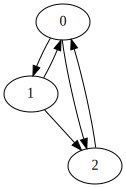

In [39]:
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### Fonction qui retourne un tableau contenant les noms des sommets prédécesseurs du sommet donné

In [68]:
def predecesseurs(g,s):
    res = []
    for i, j in enumerate(a[s] for a in g):
        if i not in res and j:
            res.append(i)
    return res

In [41]:
# test de la fonction predecesseurs
print("Prédécesseurs du sommet 0 :", predecesseurs(graphe1,0))
print("Prédécesseurs du sommet 1 :", predecesseurs(graphe1,1))
print("Prédécesseurs du sommet 2 :", predecesseurs(graphe1,2))

Prédécesseurs du sommet 0 : {0, 1, 2}
Prédécesseurs du sommet 1 : {0, 1, 2}
Prédécesseurs du sommet 2 : {0, 1, 2}


#### Fonction qui retourne la matrice d'adjacence correspondant au graphe réciproque du graphe donné

In [42]:
def graphe_reciproque(g):
    return [[g[i][j] for i in range(len(g))] for j in range(len(g))]

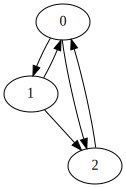

In [43]:
gdot1

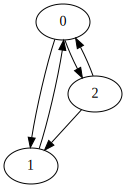

In [67]:
# test de la fonction graphe_reciproque
graphe1_rec = graphe_reciproque(graphe1)
#print(graphe1_rec)
gdot1_rec = creation_graphe_graphviz(graphe1_rec)
gdot1_rec

#### Fonction qui retourne la matrice d'adjacence correspondant au graphe complémentaire du graphe donné

In [45]:
def graphe_complementaire(g):
    return [[int(not g[i][j]) for j in range(len(g))] for i in range(len(g))]

In [46]:
# test de la fonction graphe_complementaire
graphe1_comp = graphe_complementaire(graphe1)
#print(graphe1_rec)
gdot1_comp = creation_graphe_graphviz(graphe1_comp)
gdot1_comp

#### Fonction qui retourne la matrice d'adjacence correspondant au graphe symétrique du graphe donné

In [47]:
def graphe_symetrique(g):
    return [[int(g[i][j] or g[j][i]) for j in range(len(g))] for i in range(len(g))]

In [48]:
# test de la fonction graphe_symetrique
graphe1_sym = graphe_symetrique(graphe1)
#print(graphe1_rec)
gdot1_sym = creation_graphe_graphviz(graphe1_sym)
gdot1_sym

#### Fonction qui indique si la liste des sommets donnés correspond à un chemin, dans le graphe donné

In [49]:
def est_chemin(g, ls):
    if len(ls) <= 1:
        return True
    if not g[ls[0]][ls[1]]: 
        return False
    return est_chemin(g, ls[1:])

In [50]:
# test de la fonction est_chemin
print("Chemin [] ?", est_chemin(graphe1,[]))
print("Chemin [1] ?", est_chemin(graphe1,[1]))
print("Chemin [0, 1] ?", est_chemin(graphe1,[0,1]))
print("Chemin [0, 1, 2] ?", est_chemin(graphe1,[0,1,2]))
print("Chemin [0, 2, 1] ?", est_chemin(graphe1,[0,2,1]))
print("Chemin [0, 1, 2, 2] ?", est_chemin(graphe1,[0,1,2,2]))

Chemin [] ? True
Chemin [1] ? True
Chemin [0, 1] ? True
Chemin [0, 1, 2] ? True
Chemin [0, 2, 1] ? False
Chemin [0, 1, 2, 2] ? False


#### Fonction qui indique si la liste des sommets donnés correspond à un circuit, dans le graphe donné

In [51]:
def est_circuit(g, ls):
    return est_chemin(g, ls) and g and g[0] == g[-1]

In [52]:
# test de la fonction est_circuit
print("Circuit [] ?", est_circuit(graphe1,[]))
print("Circuit [1] ?", est_circuit(graphe1,[1]))
print("Circuit [0, 1] ?", est_circuit(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_circuit(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_circuit(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2, 2] ?", est_circuit(graphe1,[0,1,2,2]))

Circuit [] ? False
Circuit [1] ? False
Circuit [0, 1] ? False
Circuit [0, 1, 2, 0] ? False
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2, 2] ? False


#### Fonction qui indique si la liste des sommets donnés correspond à un chemin élémentaire, dans le graphe donné

In [53]:
def est_chemin_elementaire(g, ls):
    if not est_chemin(g, ls):
        return False
    for i, j in enumerate(ls[:-1]):
        if j in ls[i+1:]:
            return False
    return True

In [54]:
# test de la fonction est_chemin_elementaire

#### Fonction qui indique si la liste des sommets donnés correspond à un chemin simple, dans le graphe donné

In [55]:
def est_chemin_simple(g, ls, _cache=list()):
    if len(ls) <= 1:
        return True
    if not g[ls[0]][ls[1]]: 
        return False
    if (ls[0], ls[1]) in _cache:
        return False
    _cache.append((ls[0], ls[1]))
    return est_chemin(g, ls[1:])

In [56]:
# test de la fonction est_chemin_simple

#### Fonction qui indique si la liste des sommets donnés correspond à un circuit élémentaire, dans le graphe donné

In [57]:
def est_circuit_elementaire(g, ls):
    if not est_chemin(g, ls):
        return False
    for i, j in enumerate(ls[:-1]):
        if j in ls[i+1:-1]:
            return False
    return True

In [58]:
# test de la fonction est_circuit_elementaire

#### Fonction qui indique si la liste des sommets donnés correspond à un circuit simple, dans le graphe donné

In [59]:
def est_circuit_simple(g, ls, _cache=set()):
    if not _cache and ls[0] != ls[-1]:
        return False
    if len(ls) <= 1:
        return True
    if not g[ls[0]][ls[1]]: 
        return False
    if (ls[0], ls[1]) in _cache:
        return False
    _cache.append((ls[0], ls[1]))
    return est_chemin(g, ls[1:])

In [60]:
#test de la fonction est_circuit_simple

#### Fonction qui retourne vrai si le sommet donné est une source

In [61]:
def est_source(g, s):
    return not degre_entrant(g, s)

In [62]:
# test de la fonction est_source

#### Fonction qui retourne vrai si le sommet donné est un puits

In [63]:
def est_puits(g, s):
    return not degre_sortant(g, s)

In [64]:
# test de la fonction est_puits

#### Fonction qui retourne la représentation du graphe par liste des successeurs (sous forme de liste de listes)

In [66]:
def liste_successeurs(g):
    return [successeurs(i) for i in range(len(g))]

In [ ]:
# test de la fonction liste_successeurs

#### Fonction qui retourne vrai si le graphe g2 est un sous-graphe du graphe g1 (g1 et g2 ont le même nombre de sommets)

In [ ]:
def est_sous_graphe(g1, g2):
    for i in range(g2):
        for j in range(g2):
            if g2[i][j] and not g1[i][j]:
                return False
    return True

In [ ]:
# test de la fonction est_sous_graphe

#### Fonction qui retourne le sous-graphe induit par la liste de sommets donnée (le sous-graphe n'aura plus la même numérotation des sommets, s'il en a moins que g)

In [ ]:
def sous_graphe(g, ls):
    res = []
    for i, j in enumerate(g):
        tab = []
        for k, l in enumerate(j):
            if i in ls and k in ls:
                tab.append(l)
        res.append(tab)
    return res

In [ ]:
# test de la fonction sous_graphe